The prediction of survival in breast cancer is a central topic in medical research and machine learning. It is based on extensive datasets that contain clinical information such as demographic data, tumor characteristics, treatment details, and genetic information.

Various models are used for prediction, including classification models like decision trees, random forests, and neural networks, as well as regression models such as the Cox regression, which is specifically designed for survival data. Important features for prediction include the tumor stage (TNM classification), hormone receptor status, HER2 status, and age at diagnosis.

The evaluation of the models is carried out using metrics such as accuracy, sensitivity, and specificity, while special metrics like the C-index and Kaplan-Meier curves are also important for survival analyses. However, there are challenges, such as data quality, model overfitting, and the need for interpretability of predictions for medical professionals.

# Breast Cancer Survival Prediction

In [37]:
import pandas as pd
import numpy as np
import plotly.express as px

In [38]:
df = pd.read_csv("BRCA.csv")

In [39]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [40]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [42]:
df['Histology'].value_counts()

Histology
Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: count, dtype: int64

In [43]:
df['Surgery_type'].value_counts()

Surgery_type
Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: count, dtype: int64

In [44]:
df = df.drop(columns=['Patient_ID', 'Date_of_Surgery', 'Date_of_Last_Visit'])

In [45]:
print(df["Tumour_Stage"].unique())
print(df["Histology"].unique())
print(df["ER status"].unique())
print(df["PR status"].unique())
print(df["HER2 status"].unique())
print(df["Gender"].unique())
print(df["Surgery_type"].unique())

['III' 'II' 'I' nan]
['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma' nan]
['Positive' nan]
['Positive' nan]
['Negative' 'Positive' nan]
['FEMALE' 'MALE' nan]
['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy'
 nan]


In [46]:
# Leeren Werte füllen
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Gender'] = df['Gender'].fillna('Unknown')
df['Protein1'] = df['Protein1'].fillna(df['Protein1'].median())
df['Protein2'] = df['Protein2'].fillna(df['Protein2'].median())
df['Protein3'] = df['Protein3'].fillna(df['Protein3'].median())
df['Protein4'] = df['Protein4'].fillna(df['Protein4'].median())
df['Tumour_Stage'] = df['Tumour_Stage'].fillna('Unknown')
df['Histology'] = df['Histology'].fillna('Unknown')
df['ER status'] = df['ER status'].fillna('Unknown')
df['PR status'] = df['PR status'].fillna('Unknown')
df['HER2 status'] = df['HER2 status'].fillna('Unknown')
df['Surgery_type'] = df['Surgery_type'].fillna('Unknown')
df['Patient_Status'] = df['Patient_Status'].fillna('Unknown')

In [47]:
df.isnull().sum()

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

In [48]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [49]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,341.000000,341.000000,341.000000,341.000000,341.000000
mean,58.868035,-0.029250,0.947839,-0.091907,0.010475
std,12.827711,0.557780,0.902227,0.579240,0.622562
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.349620,0.372460,-0.513320,-0.374070
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,67.000000,0.336530,1.609400,0.251210,0.412550
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [51]:
df.Gender.value_counts()

Gender
FEMALE     330
Unknown      7
MALE         4
Name: count, dtype: int64

Um den Datensatz für maschinelles Lernen vorzubereiten, müssen kategorische Merkmale in numerische Werte umgewandelt werden. Dieser Schritt ist entscheidend, da viele Algorithmen nur mit numerischen Eingaben arbeiten. Im Folgenden finden Sie die Methoden zum Transformieren der verschiedenen kategorischen Spalten

In [57]:
# Umwandlung von Patient_Status in numerische Werte und in int umwandeln
df['Patient_Status'] = df['Patient_Status'].replace({'Alive': 0, 'Dead': 1, 'Uknown': 2}).astype(int)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

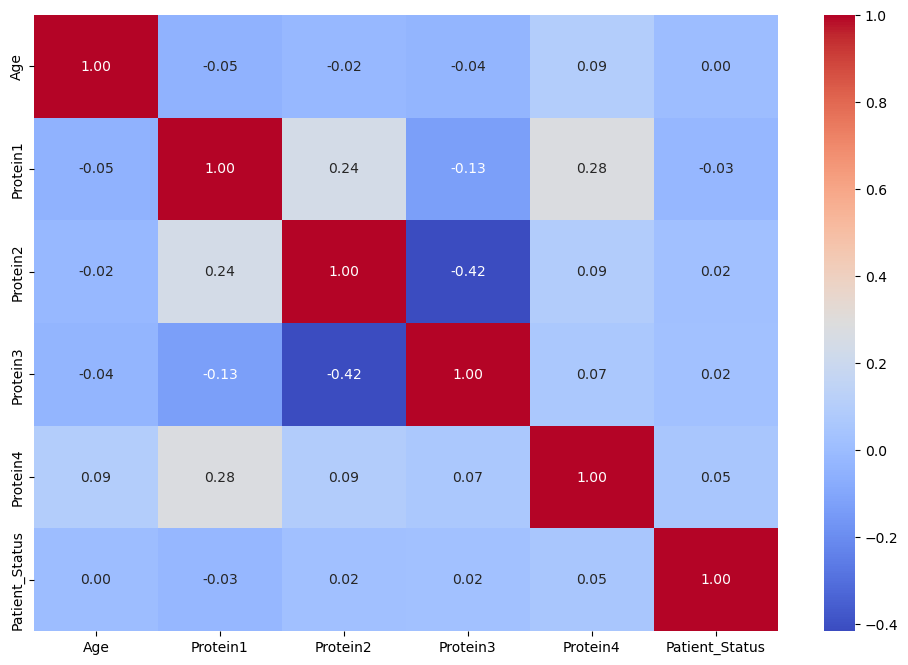

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt='.2f');

In [93]:
x = df.drop('Patient_Status', axis=1) # input
y = df['Patient_Status'] # true output

In [94]:
# In kategorische Variablen umwandeln / Kategorik degiskenleri dönüstürmek
x = pd.get_dummies(x, drop_first=True)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [98]:
G=GaussianNB()
B=BernoulliNB()
gbc=XGBClassifier()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()

In [118]:
# 1. model

In [99]:
G.fit(x_train,y_train)

GaussianNB()

In [100]:
tahmin1=G.predict(x_test)

In [101]:
accuracy_score(tahmin1, y_test)

0.6666666666666666

In [ ]:
# 2. model

In [103]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [104]:
tahmin2=kn.predict(x_test)

In [105]:
accuracy_score(tahmin2, y_test)

0.6666666666666666

In [ ]:
# 3. model

In [106]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
tahmin3=rf.predict(x_test)

In [108]:
accuracy_score(tahmin3, y_test)

0.6811594202898551

In [ ]:
# 4. model

In [109]:
B.fit(x_train,y_train)

BernoulliNB()

In [110]:
tahmin4=B.predict(x_test)

In [111]:
accuracy_score(tahmin4, y_test)

0.6666666666666666

In [ ]:
# 5. model

In [113]:
print(np.unique(y_train)) # benzersiz degerleri düzenlemek

[0 1 3]


In [114]:
y_train = np.where(y_train == 3, 2, y_train)  # 3 degerini 2 ile degistir

In [115]:
gbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [116]:
tahmin5=gbc.predict(x_test)

In [117]:
accuracy_score(tahmin5, y_test)

0.7101449275362319

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [122]:
confusion_matrix(tahmin5,y_test)

array([[46, 15,  0,  1],
       [ 2,  3,  0,  1],
       [ 0,  0,  0,  1],
       [ 0,  0,  0,  0]], dtype=int64)

<Axes: >

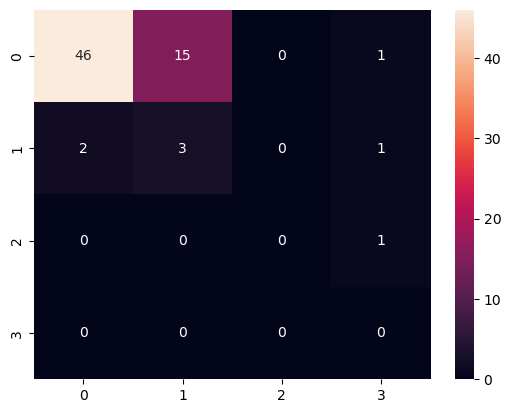

In [123]:
sns.heatmap(confusion_matrix(tahmin5,y_test),annot=True)

In [ ]:
# Das Modell hat einige Klassen gut vorhergesagt, während es bei anderen Schwierigkeiten hatte 
# The model has performed well in predicting some classes while struggling to predict others
# (model bazi siniflari iyi tahmin ederken bazilerini tahmin etmekte zorlandi)

The primary aim of survival predictions in breast cancer is to develop personalized treatment plans and improve patient monitoring, which ultimately supports clinical decision-making and enhances quality of life. This dynamic field combines medical expertise with statistical analysis, and the application of machine learning is essential in assessing survival chances. In today’s data-driven healthcare environment, this integrated approach significantly contributes to better clinical outcomes for patients.